## Parellel Coordinates

In [ ]:
!pip install --upgrade --user seaborn
!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from scipy.spatial import ConvexHull

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load Data set
cols =['symboling', 'normalized-losses','make', 'fuel-type', 'aspiration', 'num-of-doors','body-style','drive-wheels','engine-location',
      'wheel-base', 'length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system',
      'bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
missing_values = ["n/a", "na", "--" ,"?"]
df_car = pd.read_csv("imports-85.data" , header= None , names= cols , na_values = missing_values)


In [5]:
df  = df_car[['fuel-type','highway-mpg', 'price' , 'num-of-cylinders']].sample(n=30,replace = False)

# fill null price with mean number
df['price'] = df['price'].fillna(df['price'].mean())

# get unique value of fuel types
fuels_label = df['fuel-type'].unique()

# decode number of cylinders
decode_num = {"num-of-cylinders": { "two": 2, "three":3, "four":4, "five":5, "six":6, "twelve":12, "eight":8}}
df.replace(decode_num, inplace=True)


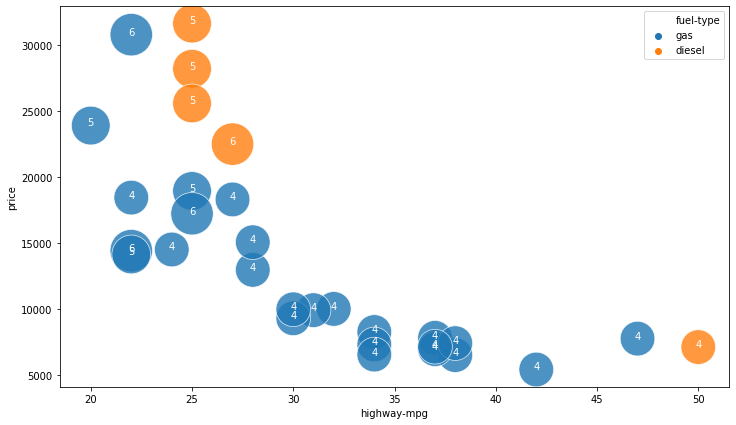

In [6]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)

scatter = sns.scatterplot( df['highway-mpg'], df['price'] , hue = df['fuel-type'] , s=df['num-of-cylinders']*300, edgecolors='b' , alpha=.8)    

#For each point, we add a text inside the bubble
for line in range(0,df.shape[0]):
     ax.text(df['highway-mpg'].iloc[line], df['price'].iloc[ line], df['num-of-cylinders'].iloc[ line],
             horizontalalignment='center', size='medium',color='#FFFFFF')

plt.show()
